In [1]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import joblib
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import functions as f

### 1. Load Data

In [3]:
df91, df01 = f.load_data()

### 2. Process Data

In [4]:
pdf91 = f.process_data(df91, ['UniqueCarrier', 'Origin', 'Dest'],['Month','DayofMonth','DayOfWeek','DepTime','FlightNum','ActualElapsedTime','DepDelay','Distance','Cancelled','Diverted'], 'cls')

In [5]:
pdf01 = f.process_data(df01, ['UniqueCarrier','TailNum' ,'Origin', 'Dest'],['Month','DayofMonth','DayOfWeek','DepTime','FlightNum','ActualElapsedTime','DepDelay','Distance','TaxiIn','TaxiOut','Cancelled','Diverted'], 'cls')

### 3. Modeling

#### 3.1 Decision Tree

In [6]:
dt91, acc_dt91 = f.train_dt(pdf91,'cls')
dt01, acc_dt01 = f.train_dt(pdf01,'cls')

In [7]:
feature_names = dt91.feature_names_in_  # Replace with the attribute name holding your feature names
importance_scores = dt91.feature_importances_

# Creating a DataFrame to display feature importances
feature_importance_dt_91 = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance_scores
})

feature_importance_dt_91

,Feature,Importance
0,UniqueCarrier,0.044000
1,Origin,0.069494
2,Dest,0.064709
3,Month,0.058703
4,DayofMonth,0.028447
5,DayOfWeek,0.016279
6,DepTime,0.087017
7,FlightNum,0.064443
8,ActualElapsedTime,0.163086
9,DepDelay,0.240266


In [8]:
feature_names = dt01.feature_names_in_  # Replace with the attribute name holding your feature names
importance_scores = dt01.feature_importances_

# Creating a DataFrame to display feature importances
feature_importance_dt_01 = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance_scores
})

feature_importance_dt_01

,Feature,Importance
0,UniqueCarrier,0.022424
1,TailNum,0.039369
2,Origin,0.044534
3,Dest,0.037282
4,Month,0.032065
5,DayofMonth,0.026145
6,DayOfWeek,0.014851
7,DepTime,0.054923
8,FlightNum,0.045173
9,ActualElapsedTime,0.093957


#### 3.1 XG Boost

In [9]:
xgb91, acc_xgb91 = f.train_xgb(pdf91,'cls')
xgb01, acc_xgb01 = f.train_xgb(pdf01,'cls')

### 4. Results


#### 4.1 Accuracies

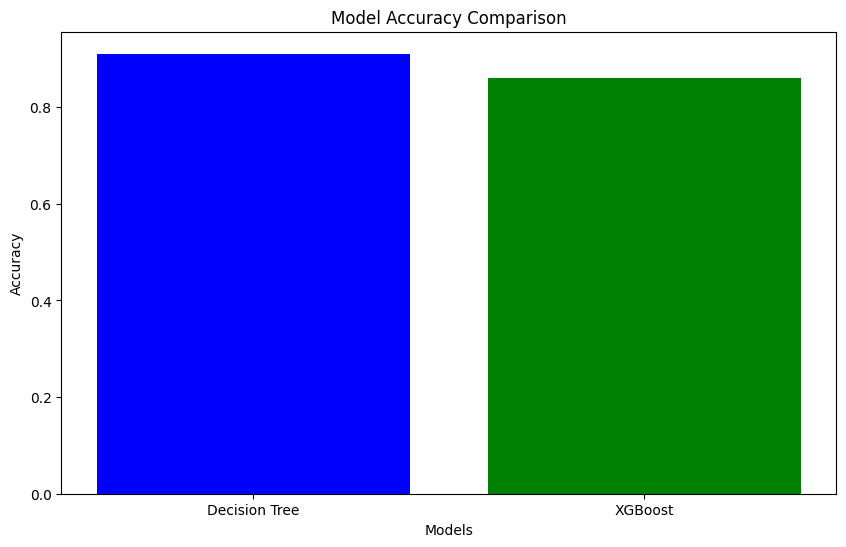

In [10]:
f.plot_model_accuracy([acc_dt91,acc_xgb91])

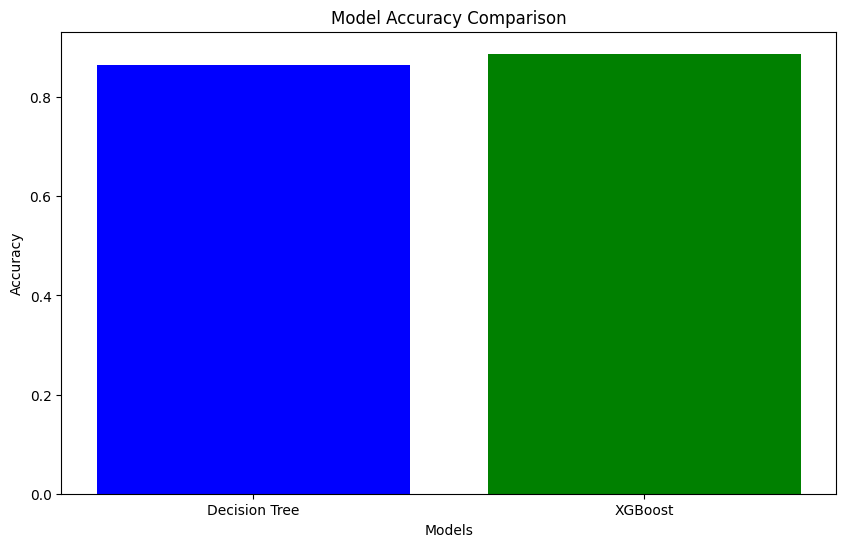

In [11]:
f.plot_model_accuracy([acc_dt01,acc_xgb01])

- Save Accuracies

In [12]:
pd.DataFrame({
    'Model': ['Decision Tree', 'XGBoost'],
    'Year 91': [acc_dt91, acc_xgb91],
    'Year 01': [acc_dt01, acc_xgb01]
}).to_csv('Data/accuracies.csv',index=False)

#### 4.2 Feature Importance

In [13]:
dt_feature_importance_91 = f.feature_importance(dt91)

In [14]:
xgb_feature_importance_91 = f.feature_importance(xgb91)

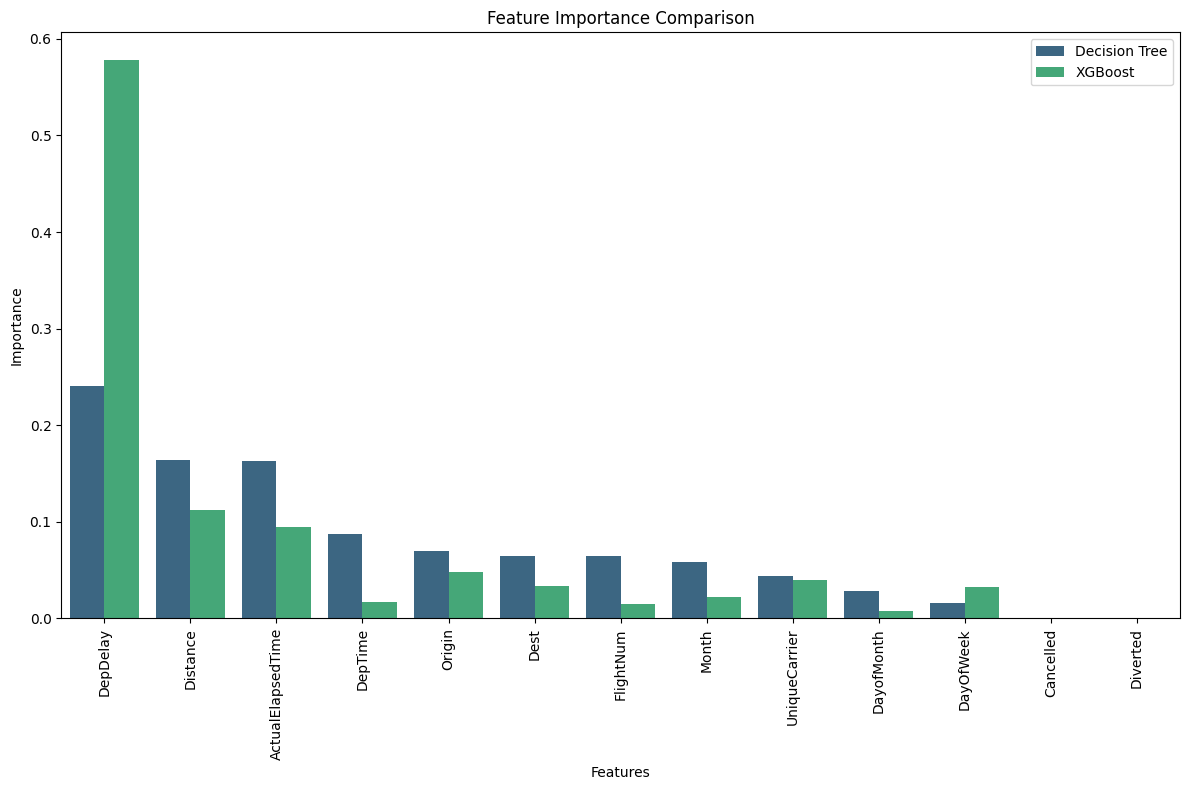

In [15]:
combined_feature_importance = f.combine_feature_importance_dfs(dt_feature_importance_91, xgb_feature_importance_91)

f.plot_feature_importance(combined_feature_importance)

In [16]:
# combined_feature_importance.to_csv('Data/features_importance_91.csv')

In [17]:
dt_feature_importance_01 = f.feature_importance(dt01)

In [18]:
xgb_feature_importance_01 = f.feature_importance(xgb01)

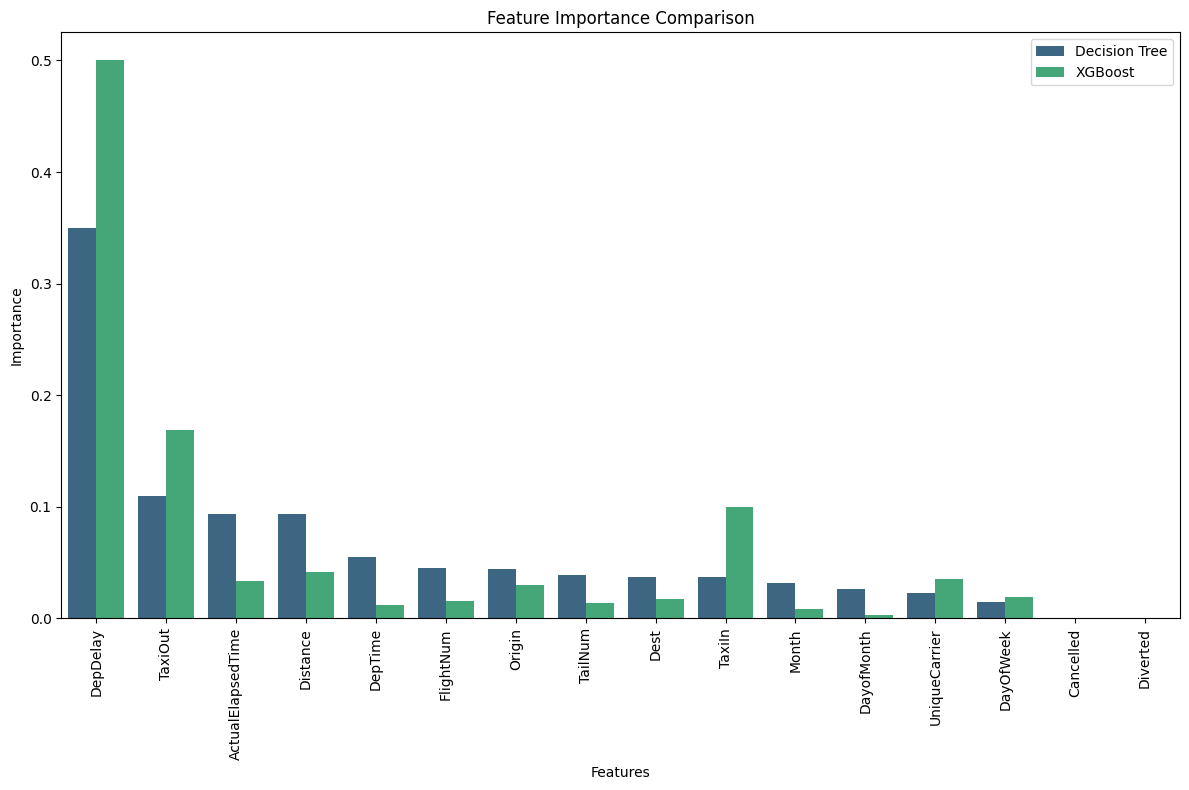

In [19]:
combined_feature_importance = f.combine_feature_importance_dfs(dt_feature_importance_01, xgb_feature_importance_01)

f.plot_feature_importance(combined_feature_importance)

In [20]:
# combined_feature_importance.to_csv('Data/features_importance_01.csv')